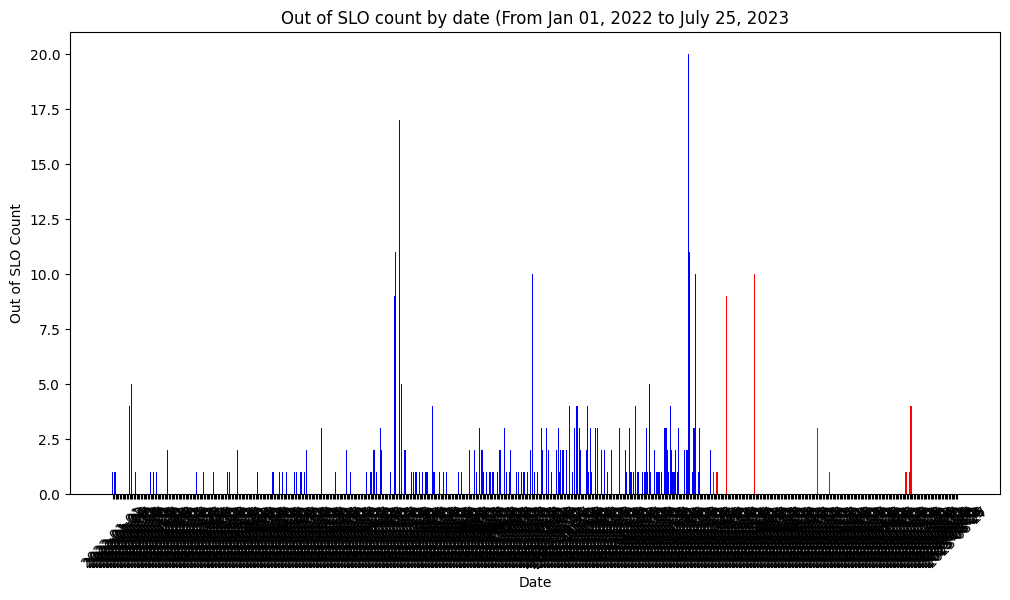

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Read in the file and load the dates into a list
with open('dated.out', 'r') as file:
    dates = file.readlines()

dates = [date.strip() for date in dates]

# Filter out dates to make plot more readable
dates = [date for date in dates if date >= "2022-01-01"]

# Use Counter to count occurrences of each unique date
date_counts = Counter(dates)

# Create a DataFrame from the date and count information
df_counts = pd.DataFrame({
    "date": list(date_counts.keys()),
    "count": list(date_counts.values())
})

# fill in missing dates
date_range = pd.date_range(start="2022-01-01", end=pd.Timestamp.today(), freq='D').strftime('%Y-%m-%d')
df_all_dates = pd.DataFrame({
    "date": date_range,
    "count": [0] * len(date_range)
})


df = pd.merge(df_all_dates, df_counts, on="date", how="left")

# and set their counts to 0
df['count'] = df['count_y'].fillna(0)

df = df.sort_values("date")

# based on start date
colors = ['red' if date >= '2023-03-06' else 'blue' for date in df['date']]

# Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(df['date'], df['count'], color=colors)
plt.xlabel('Date')
plt.ylabel('Out of SLO Count')
plt.title('Out of SLO count by date (From Jan 01, 2022 to July 25, 2023')
plt.xticks(rotation=45)
plt.show()
